In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_pickle('df.pkl')
df

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento,descuento_pct
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358,0.011139
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644,0.006234
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000,0.005051
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,0.008902
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944298,1,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,<NA>,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229,0.000890
2944343,1,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,<NA>,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000,0.002685
2944371,1,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,0.001337
2944388,1,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,<NA>,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614,0.000084


Preprocesamiento y limpieza del dataset:

    1- Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.
    2- Realizar el split del dataset (ej: train y test).
    3- Identificar y tratar los valores faltantes en el dataset.
    4- Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.
    5- Escalar y / o normalizar los features.

### 1.1 Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.

In [20]:
df.drop(columns=['descuento_pct'], inplace=True)
df['productos_marca'] = df['productos_marca'].fillna('N/A')
df

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,N/A,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,N/A,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944298,1,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,N/A,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229
2944343,1,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,N/A,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000
2944371,1,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
2944388,1,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,N/A,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614


In [24]:
#ahora veremos que cantidad de nulos tendremos en cada columna:
# --- La línea de código clave ---
conteo_nulos = df.isnull().sum()

# Imprimir el resultado
print("Conteo de valores nulos por columna:")
conteo_nulos

Conteo de valores nulos por columna:


id_bandera                              0
id_sucursal                             0
id_producto                             0
productos_descripcion                   0
productos_unidad_medida_presentacion    0
productos_marca                         0
productos_precio_lista                  0
productos_precio_referencia             0
productos_cantidad_referencia           0
productos_unidad_medida_referencia      0
productos_precio_unitario_promo1        0
productos_leyenda_promo1                0
descuento                               0
dtype: int64

**Una aclaración a cerca de los valores 'N/A' de productos_marca.**

Dada la características del dataframe e interpretando un poco el negocio, suponemos que esos valores corresponden a marcas poco conocidas, con poca cantidad de productos, en fin, sin peso en el supermercado, por lo tanto, creemos que la manera correcta de tratarlos es imputando el valor 'N/A'.


_Podriamos extraer la fecha de la promocion, solo eso en una columna y agrupar los tipos de fecha, es decir en una columna poner los dias de duracion de la promocion._


Los datos ya estan limpios y el dataset tiene solo información relevante.

### 1.2- Realizar el split del dataset (ej: train y test)


Primero deberemos separar entre las columnas features y la target:

In [11]:
df.columns

Index(['id_bandera', 'id_sucursal', 'id_producto', 'productos_descripcion',
       'productos_unidad_medida_presentacion', 'productos_marca',
       'productos_precio_lista', 'productos_precio_referencia',
       'productos_cantidad_referencia', 'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1', 'productos_leyenda_promo1',
       'descuento'],
      dtype='object')

In [ ]:
y = df[['descuento']]
X = df.drop(columns=['descuento'])
#separar en train y test:

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
    )

### 1.4- Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.

In [26]:
#se puede borrar este bloque para presentar el tp.
df.columns

Index(['id_bandera', 'id_sucursal', 'id_producto', 'productos_descripcion',
       'productos_unidad_medida_presentacion', 'productos_marca',
       'productos_precio_lista', 'productos_precio_referencia',
       'productos_cantidad_referencia', 'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1', 'productos_leyenda_promo1',
       'descuento'],
      dtype='object')

Ya se hizo un análisis con técnicas visuales en el TP1. 

Se encuentran ouliers en la columna precio (y todas las columnas relacionadas con precio) y en la columna descuento. Como lo que queremos es encontrar predicciones en el **porcentaje** de descuento, los valores ouliers en precio no deberian afectar al porcentaje de descuento. 

Por otro lado, viendo el gráfico de descuento en función del precio de lista (ver TP1), vemos que los descuentos mas agresivos (cercanos al 80 %) se dan para productos de bajo costo. 

Por lo tanto consideramos que para que el comportamiento del modelo sea mas presiso, y a apuntar a tener menor error, nos concentraremos en eliminar valores atipicos de descuentos. 



In [29]:
df.loc[df['descuento']>70]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
3028,2,263,7791600070069,EAU DE TOILETTE HOMBRE CRANDALL X 95 CC,UNI,CRANDALL,17860.0,188000.000000,95,CM3,5125.0,Promo A valida desde el 13/06/2025 hasta 22/07...,71.304588
4577,1,23,7500435153164,CREMA DENTAL 100% ESMALTE ORAL B X 70GRM,UNI,ORAL B,5919.0,84557.140625,70,GRM,1490.0,Promo A valida desde el 19/06/2025 hasta 30/06...,74.826828
5769,1,1,3616479568957,ALICATE CORTE AISLADO CARREFOUR,UNI,CARREFOUR,11900.0,11900.000000,1,UNI,2190.0,Promo A valida desde el 01/06/2025 hasta 31/07...,81.596634
7462,1,11,7798403180056,POLLERA TEX TABLEADA SARGA,UNI,N/A,26990.0,26990.000000,1,UNI,4990.0,Promo A valida desde el 22/05/2025 hasta 06/08...,81.511673
8513,1,9,7790310985601,NACHOS TOSTITOS X 129 GRS,UNI,TOSTITOS,4350.0,33720.929688,129,GRM,837.0,Promo A valida desde el 25/06/2025 hasta 27/06...,80.758621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936867,1,51,7500435153164,CREMA DENTAL 100% ESMALTE ORAL B X 70GRM,UNI,ORAL B,5919.0,84557.140625,70,GRM,1490.0,Promo A valida desde el 19/06/2025 hasta 30/06...,74.826828
2940518,1,21,3616953013683,SUNGA TEX ESTAMPADO I930622,UNI,N/A,21990.0,21990.000000,1,UNI,4990.0,Promo A valida desde el 22/05/2025 hasta 06/08...,77.307869
2941757,3,443,7500435153164,CREMA DENTAL 100% ESMALTE ORAL B X 70GRM,UNI,ORAL B,6909.0,98700.000000,70,GRM,1490.0,Promo A valida desde el 13/06/2025 hasta 30/06...,78.433922
2942244,3,495,0000077982346,CHICLE MENTA BUBBALOO X 5 GRS,UNI,BUBBALOO,109.0,21800.000000,5,GRM,21.0,Promo A valida desde el 26/06/2025 hasta 27/06...,80.733940


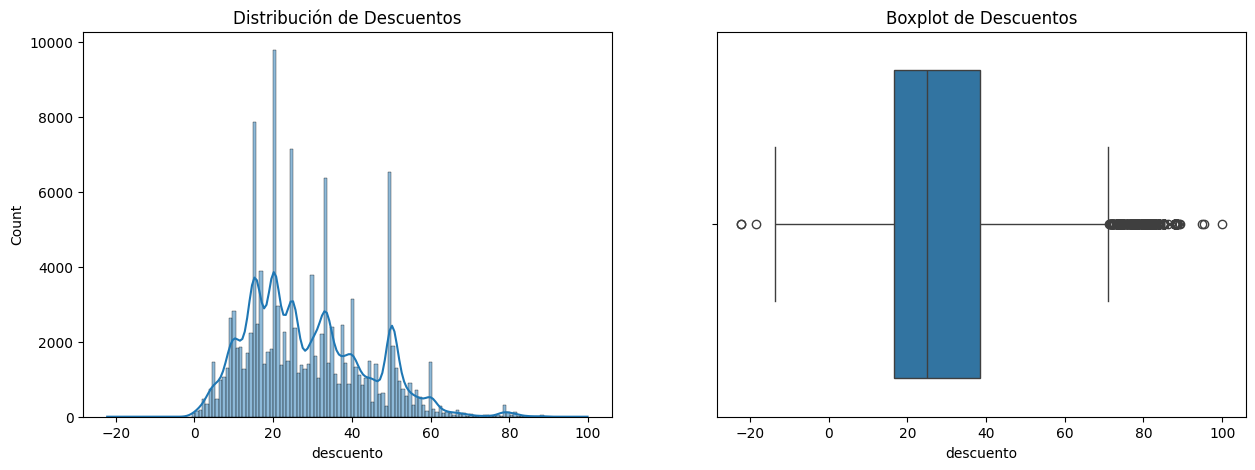

count    130134.000000
mean         28.529009
std          15.110181
min         -22.183407
25%          16.672224
50%          25.031290
75%          38.491146
max          99.874092
Name: descuento, dtype: float64


In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma y KDE (Estimación de Densidad de Kernel)
sns.histplot(df['descuento'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Descuentos')

# Boxplot
sns.boxplot(x=df['descuento'], ax=axes[1])
axes[1].set_title('Boxplot de Descuentos')

plt.show()

# También mira las estadísticas descriptivas
print(df['descuento'].describe())

La distribución del porcentaje de descuento tiene parecido aproximado a una normal, pero con algo de sesgo a la derecha. Observar que hay algunos valores con descuento negativo. Eso claramente es un error. Por otro lado, hay productos con descuento muy agresivo como por ejemplo 80 %. Seguramente (aunque podria indagarse mas) eso corresponde a un 80 % de descuento en la segunda unidad y eso no es un descuento real por producto, sino un descuento llevando mas de una unidad.

Por eso, decidimos que la mejor estrategia es aplicar la técnica de la eliminación de valores ouliers con el método del rango intercuartil con un valor k de 1.5 y con un limite inferior de 0.

Límite inferior para outliers: 0.00
Límite superior para outliers: 71.22
------------------------------
Número de outliers detectados: 955
Muestra de outliers:
      id_bandera  id_sucursal    id_producto  \
3028           2          263  7791600070069   
4577           1           23  7500435153164   
5769           1            1  3616479568957   
7462           1           11  7798403180056   
8513           1            9  7790310985601   

                         productos_descripcion  \
3028   EAU DE TOILETTE HOMBRE CRANDALL X 95 CC   
4577  CREMA DENTAL 100% ESMALTE ORAL B X 70GRM   
5769           ALICATE CORTE AISLADO CARREFOUR   
7462                POLLERA TEX TABLEADA SARGA   
8513                 NACHOS TOSTITOS X 129 GRS   

     productos_unidad_medida_presentacion productos_marca  \
3028                                  UNI        CRANDALL   
4577                                  UNI          ORAL B   
5769                                  UNI       CARREFOUR   
7462  

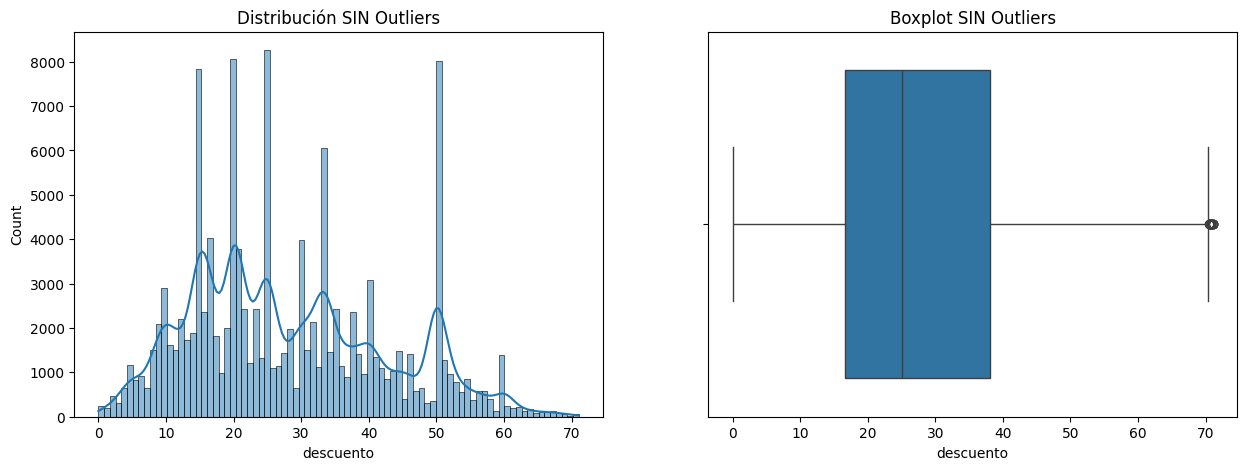

In [32]:
# 1. Calcular Q1, Q3 e IQR para la columna 'descuento'

Q3 = df['descuento'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calcular los límites para detectar outliers
limite_inferior = 0 # no pueden haber valores negativos.
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior para outliers: {limite_inferior:.2f}")
print(f"Límite superior para outliers: {limite_superior:.2f}")
print("-" * 30)

# 3. Identificar los outliers
outliers = df[(df['descuento'] < limite_inferior) | (df['descuento'] > limite_superior)]
print(f"Número de outliers detectados: {len(outliers)}")
if not outliers.empty:
    print("Muestra de outliers:")
    print(outliers.head())

# 4. Eliminar los outliers (las filas enteras)
# Usamos el operador ~ (tilde) que significa "no" o "inversión"
df_sin_outliers = df[~((df['descuento'] < limite_inferior) | (df['descuento'] > limite_superior))]

# 5. Comparar el antes y el después
print("-" * 30)
print(f"Tamaño original del DataFrame: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_sin_outliers.shape}")

# Visualiza el resultado para confirmar
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df_sin_outliers['descuento'], kde=True, ax=axes[0])
axes[0].set_title('Distribución SIN Outliers')
sns.boxplot(x=df_sin_outliers['descuento'], ax=axes[1])
axes[1].set_title('Boxplot SIN Outliers')
plt.show()